In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
groceries_df = pd.read_csv('Grocery_std.csv')

NameError: name 'pd' is not defined

In [3]:
groceries_df.head()

,Unnamed: 0,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [4]:
groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        440 non-null    int64  
 1   Fresh             440 non-null    float64
 2   Milk              440 non-null    float64
 3   Grocery           440 non-null    float64
 4   Frozen            440 non-null    float64
 5   Detergents_Paper  440 non-null    float64
 6   Delicassen        440 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 24.2 KB


In [5]:
groceries_df.describe()

,Unnamed: 0,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,219.500000,-3.027881e-17,1.614870e-17,-5.652044e-17,5.652044e-17,4.037175e-17,2.422305e-17
std,127.161315,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,0.000000,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,109.750000,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,219.500000,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,329.250000,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,439.000000,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [6]:
groceries_df.drop(['Unnamed: 0'], axis=1, inplace=True)

## DBScan

In [7]:
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [11]:
eps_ = np.arange(0.3, 1.1, 0.05)
min_samples = np.arange(3, 13)

params = product(eps_, min_samples)

In [12]:
for eps, min_sample in params:
    db = DBSCAN(eps=eps, min_samples=min_sample).fit(groceries_df)
    labels = db.labels_
    n_clusters = len(set(labels))
    score = silhouette_score(groceries_df, labels)
    
    if n_clusters > 1:
        print(f'eps = {eps:.2f} min_samples = {n_clusters} n_clusters = {n_clusters} score = {score:.2f}')
    else:
        print('Cluster size too small')

eps = 0.30 min_samples = 7 n_clusters = 7 score = -0.30
eps = 0.30 min_samples = 3 n_clusters = 3 score = -0.11
eps = 0.30 min_samples = 3 n_clusters = 3 score = -0.13
eps = 0.30 min_samples = 3 n_clusters = 3 score = -0.15
eps = 0.30 min_samples = 3 n_clusters = 3 score = -0.16
eps = 0.30 min_samples = 3 n_clusters = 3 score = -0.17
eps = 0.30 min_samples = 2 n_clusters = 2 score = -0.08
eps = 0.30 min_samples = 2 n_clusters = 2 score = -0.09
eps = 0.30 min_samples = 2 n_clusters = 2 score = -0.10
eps = 0.30 min_samples = 2 n_clusters = 2 score = -0.11
eps = 0.35 min_samples = 9 n_clusters = 9 score = -0.26
eps = 0.35 min_samples = 3 n_clusters = 3 score = -0.03
eps = 0.35 min_samples = 3 n_clusters = 3 score = -0.14
eps = 0.35 min_samples = 2 n_clusters = 2 score = 0.05
eps = 0.35 min_samples = 3 n_clusters = 3 score = -0.11
eps = 0.35 min_samples = 3 n_clusters = 3 score = -0.12
eps = 0.35 min_samples = 3 n_clusters = 3 score = -0.12
eps = 0.35 min_samples = 3 n_clusters = 3 score =

## Creating the model

In [13]:
model = DBSCAN(eps=0.95, min_samples=2).fit(groceries_df)

In [14]:
groceries_df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

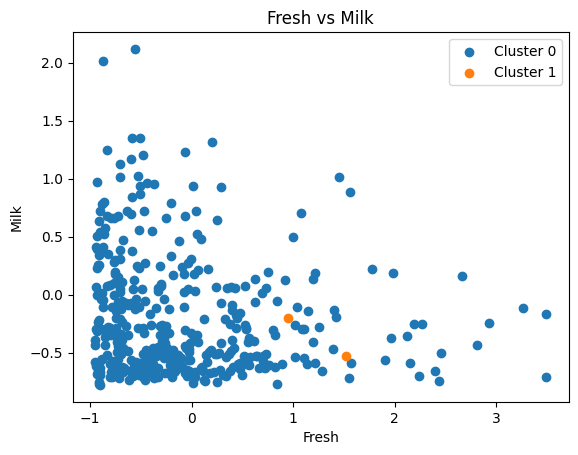

In [16]:
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh vs Milk')

for i in range(2):
    plt.scatter(
        groceries_df['Fresh'][model.labels_ == i],
        groceries_df['Milk'][model.labels_ == i],
        label=f'Cluster {i}'
    )

plt.legend();

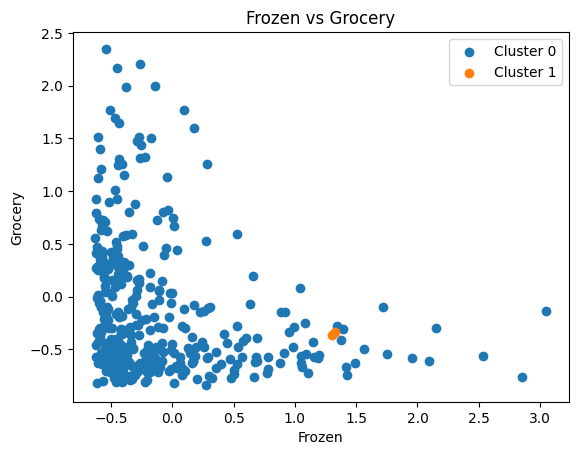

In [18]:
plt.xlabel('Frozen')
plt.ylabel('Grocery')
plt.title('Frozen vs Grocery')

for i in range(2):
    plt.scatter(
        groceries_df['Frozen'][model.labels_ == i],
        groceries_df['Grocery'][model.labels_ == i],
        label=f'Cluster {i}'
    )

plt.legend();